In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# refer to readme file

In [ ]:
gtd = pd.read_csv('/content/GDT_2000_2019.csv')
gtd = gtd[gtd['iyear'] >= 2000]
gtd.head()

# test that when i search year < 2000, it yields nothing

,iyear,imonth,iday,country,country_txt,region,region_txt,latitude,longitude,specificity,doubtterr,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,natlty1,natlty1_txt,gname,motive,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,hostkidoutcome_txt,nreleased
69832,2000,1,1,139,Namibia,11,Sub-Saharan Africa,-17.910812,19.988303,2.0,0,1,0,2,Armed Assault,1,Business,2.0,Restaurant/Bar/Café,139.0,Namibia,National Union for the Total Independence of A...,Unknown,NaN,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0.0,7.0,0.0,NaN,-9,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69833,2000,1,1,139,Namibia,11,Sub-Saharan Africa,-17.910812,19.988303,2.0,0,1,0,6,Hostage Taking (Kidnapping),1,Business,11.0,Entertainment/Cultural/Stadium/Casino,139.0,Namibia,National Union for the Total Independence of A...,Unknown,NaN,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0.0,7.0,0.0,NaN,-9,NaN,NaN,NaN,1.0,20.0,0.0,NaN,-99.0,0.0,NaN,NaN,NaN,NaN,7.0,Unknown,-99.0
69834,2000,1,1,92,India,6,South Asia,32.925224,75.135264,1.0,1,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",92.0,India,Lashkar-e-Taiba (LeT),Unknown,NaN,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,1.0,0.0,NaN,2.0,0.0,NaN,-9,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69835,2000,1,1,1003,Kosovo,9,Eastern Europe,42.659809,20.307119,1.0,0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,76.0,House/Apartment/Residence,103.0,Kazakhstan,Unknown,Unknown,NaN,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,0.0,1.0,0.0,0.0,-9,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69836,2000,1,1,182,Somalia,11,Sub-Saharan Africa,2.059819,45.326115,1.0,1,1,0,2,Armed Assault,14,Private Citizens & Property,77.0,Laborer (General)/Occupation Identified,182.0,Somalia,Unknown,It was possible the attack was a form of clan-...,NaN,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,6.0,0.0,0.0,10.0,0.0,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# number of events over time

time = gtd.groupby(['iyear', 'imonth']).count()['iday']
time

iyear  imonth
2000   1         184
       2         112
       3         100
       4         104
       5         130
                ... 
2019   8         639
       9         664
       10        623
       11        512
       12        652
Name: iday, Length: 240, dtype: int64

Text(0, 0.5, 'Number of Terrorist Attacks')

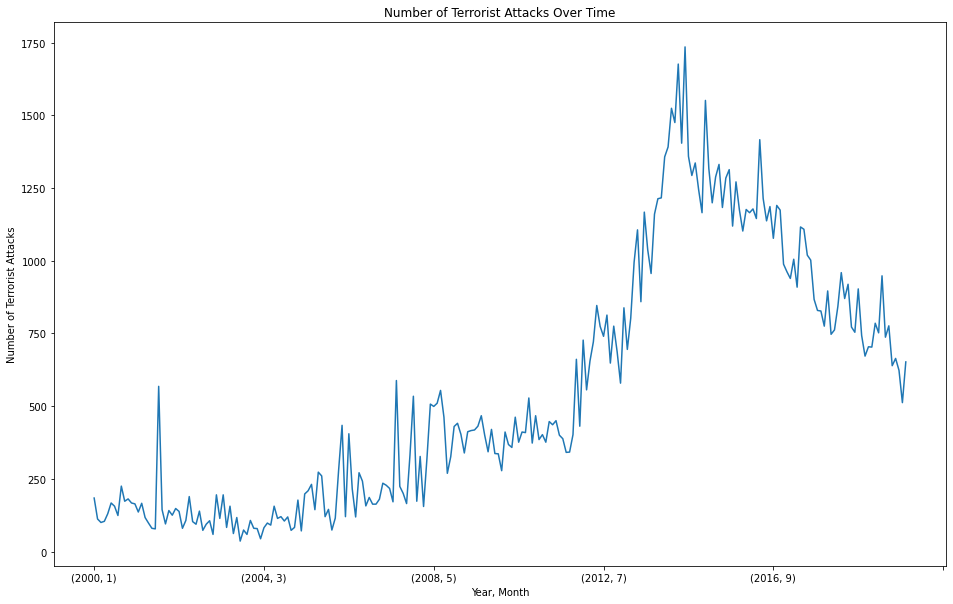

In [ ]:
time_plot = time.plot.line(figsize= (16, 10))
time_plot.set_title('Number of Terrorist Attacks Over Time')
time_plot.set_xlabel('Year, Month')
time_plot.set_ylabel('Number of Terrorist Attacks')

In [ ]:
# what is the most common attack type

type_1 = gtd.groupby('attacktype1_txt').count()['iyear'].sort_values(ascending= False)
type_1

attacktype1_txt
Bombing/Explosion                      66047
Armed Assault                          31168
Hostage Taking (Kidnapping)            10069
Assassination                           8533
Facility/Infrastructure Attack          6954
Unknown                                 6919
Unarmed Assault                          777
Hostage Taking (Barricade Incident)      494
Hijacking                                389
Name: iyear, dtype: int64

Text(0, 0.5, 'Attack Type')

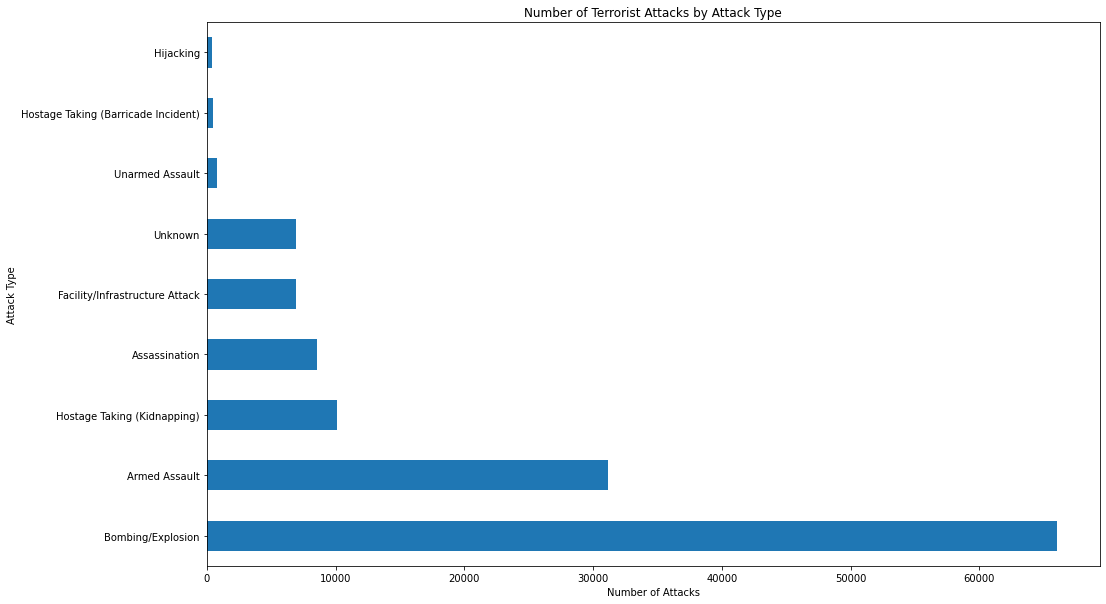

In [ ]:
type_1_plot = type_1.plot.barh(figsize= (16, 10))
type_1_plot.set_title('Number of Terrorist Attacks by Attack Type')
type_1_plot.set_xlabel('Number of Attacks')
type_1_plot.set_ylabel('Attack Type')

In [ ]:
# what event type leads to the most fatalities

type_nkill = gtd.groupby('attacktype1_txt').mean('nkill')['nkill'].sort_values(ascending= False)
type_nkill

attacktype1_txt
Hijacking                              9.711310
Hostage Taking (Barricade Incident)    8.409382
Unknown                                5.069051
Hostage Taking (Kidnapping)            3.613299
Armed Assault                          3.218063
Bombing/Explosion                      2.160063
Assassination                          1.228434
Unarmed Assault                        0.670116
Facility/Infrastructure Attack         0.406300
Name: nkill, dtype: float64

Text(0, 0.5, 'Attack Type')

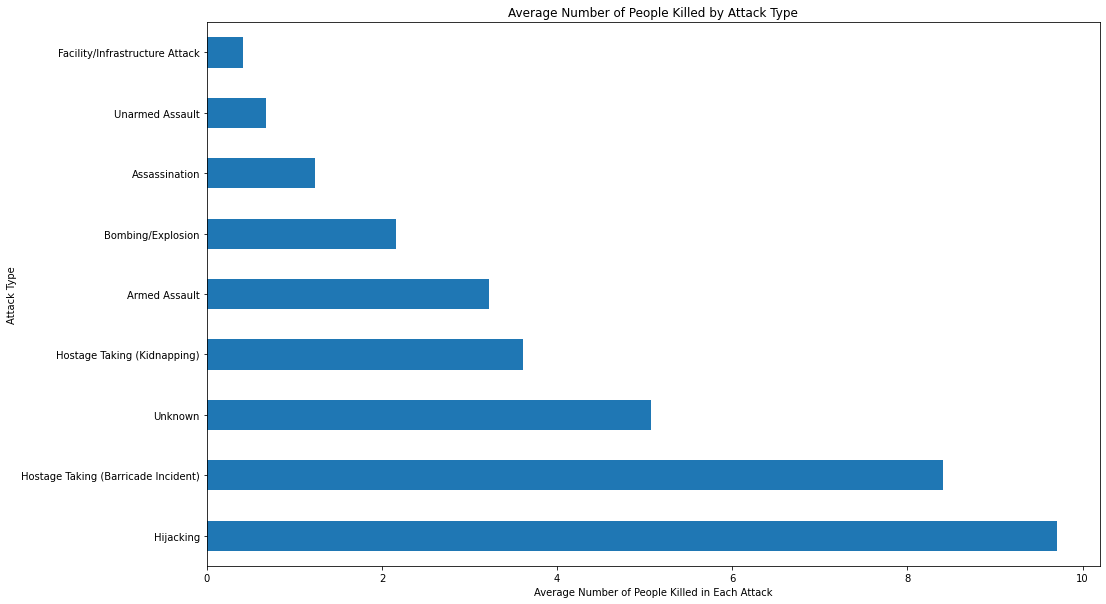

In [ ]:
type_nkill_plot = type_nkill.plot(kind= 'barh', figsize= (16, 10))
type_nkill_plot.set_title('Average Number of People Killed by Attack Type')
type_nkill_plot.set_xlabel('Average Number of People Killed in Each Attack')
type_nkill_plot.set_ylabel('Attack Type')

In [ ]:
# does the motive of the attack have any impact?

motive_nkill = gtd.groupby('motive').sum('nkill')['nkill'].sort_values(ascending= False)
motive_nkill

# this isn't helpful :(

motive
Unknown                                                                                                                                                                                                                                                                                                                                                                                                                  45314.0
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                                                                           24376.0
The Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in revenge for the killing of ISIL leader Abdul-Rahman 

In [ ]:
# let's focus on hostage situations

hostage = gtd[(gtd['attacktype1_txt'] == 'Hostage Taking (Barricade Incident)') | (gtd['attacktype1_txt'] == 'Hostage Taking (Kidnapping)')]
hostage.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,latitude,longitude,specificity,doubtterr,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,natlty1,natlty1_txt,gname,motive,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,hostkidoutcome_txt,nreleased
69833,2000,1,1,139,Namibia,11,Sub-Saharan Africa,-17.910812,19.988303,2.0,0,1,0,6,Hostage Taking (Kidnapping),1,Business,11.0,Entertainment/Cultural/Stadium/Casino,139.0,Namibia,National Union for the Total Independence of A...,Unknown,NaN,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0.0,7.0,0.0,NaN,-9,NaN,NaN,NaN,1.0,20.0,0.0,NaN,-99.0,0.0,NaN,NaN,NaN,NaN,7.0,Unknown,-99.0
69927,2000,1,13,213,Uganda,11,Sub-Saharan Africa,2.772404,32.288073,2.0,0,1,0,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,213.0,Uganda,Lord's Resistance Army (LRA),Unknown,NaN,0.0,0.0,13,Unknown,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,NaN,1.0,30.0,0.0,NaN,-99.0,0.0,NaN,NaN,NaN,NaN,7.0,Unknown,-99.0
69943,2000,1,16,92,India,6,South Asia,23.826754,91.431903,1.0,0,1,0,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,92.0,India,National Liberation Front of Tripura (NLFT),Unknown,NaN,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,1.0,4.0,0.0,NaN,-99.0,0.0,NaN,NaN,NaN,NaN,7.0,Unknown,-99.0
69949,2000,1,17,228,Yemen,10,Middle East & North Africa,NaN,NaN,5.0,0,1,0,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,71.0,Race/Ethnicity Identified,69.0,France,Unknown,The tribesmen wanted an increase in government...,NaN,0.0,0.0,13,Unknown,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,1.0,4.0,0.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,4.0
69977,2000,1,25,228,Yemen,10,Middle East & North Africa,15.502404,45.449854,4.0,1,1,0,6,Hostage Taking (Kidnapping),21,Utilities,108.0,Oil,217.0,United States,Tribesmen,Unknown,NaN,0.0,0.0,13,Unknown,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,17.0,0.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,1.0


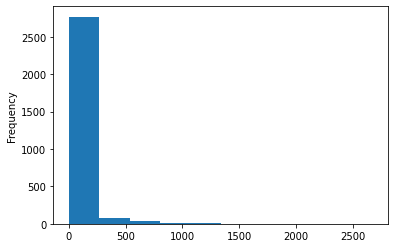

In [ ]:
# what is the distribution of hostage days?

ndays = hostage[hostage['ndays'] >= 0]['ndays']

ndays.plot(kind= 'hist')

In [ ]:
quartiles = np.nanpercentile(ndays, [25, 50, 75])
data_min, data_max = ndays.min(), ndays.max()

print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 2.000
Median: 5.000
Q3: 22.000
Max: 2676.000


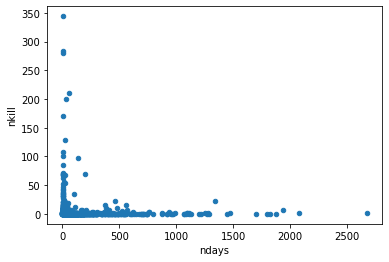

In [ ]:
# is there a relation between the number of hostage days and kills?

hostage[hostage['ndays'] >= 0].plot(x= 'ndays', y= 'nkill', kind= 'scatter')

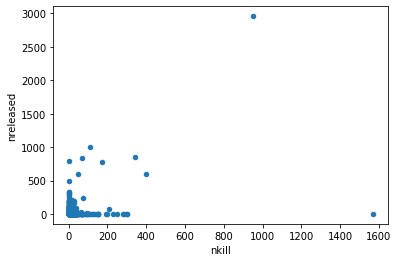

In [ ]:
# what about nkill and nreleased

hostage[hostage['nreleased'] >= 0].plot(x= 'nkill', y= 'nreleased', kind= 'scatter')

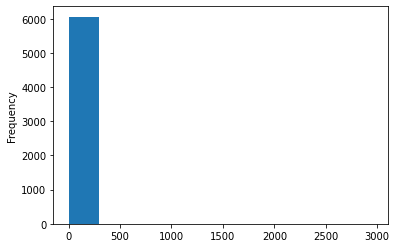

In [ ]:
# what is the distribution of nreleased

nreleased = hostage[hostage['nreleased'] >= 0]['nreleased']
nreleased.plot(kind= 'hist')

In [ ]:
quartiles = np.nanpercentile(nreleased, [25, 50, 75])
data_min, data_max = nreleased.min(), nreleased.max()

print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 0.000
Median: 1.000
Q3: 3.000
Max: 2958.000


In [ ]:
# Unit Tests for Project Group 1
# Brago Aboagye-Nyame, Grant Redfield, Mary Youssef
import unittest
class ProjectTestCase(unittest.TestCase):
    def test_subset(self):
        self.assertEqual(gtd[gtd['iyear'] < 2000].shape[0], 0)
    # testing that the data subsetted correctly and removed everything before 2000
    
    def test_yearmonth(self):
        self.assertEqual(len(time), 20*12)
    # testing that the groupby captured all the year, month combinations
    
    
if __name__ == '__main__':
  unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.008s

OK
